In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
fish = pd.read_csv('new_fish.csv')

In [6]:
fish.head()

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


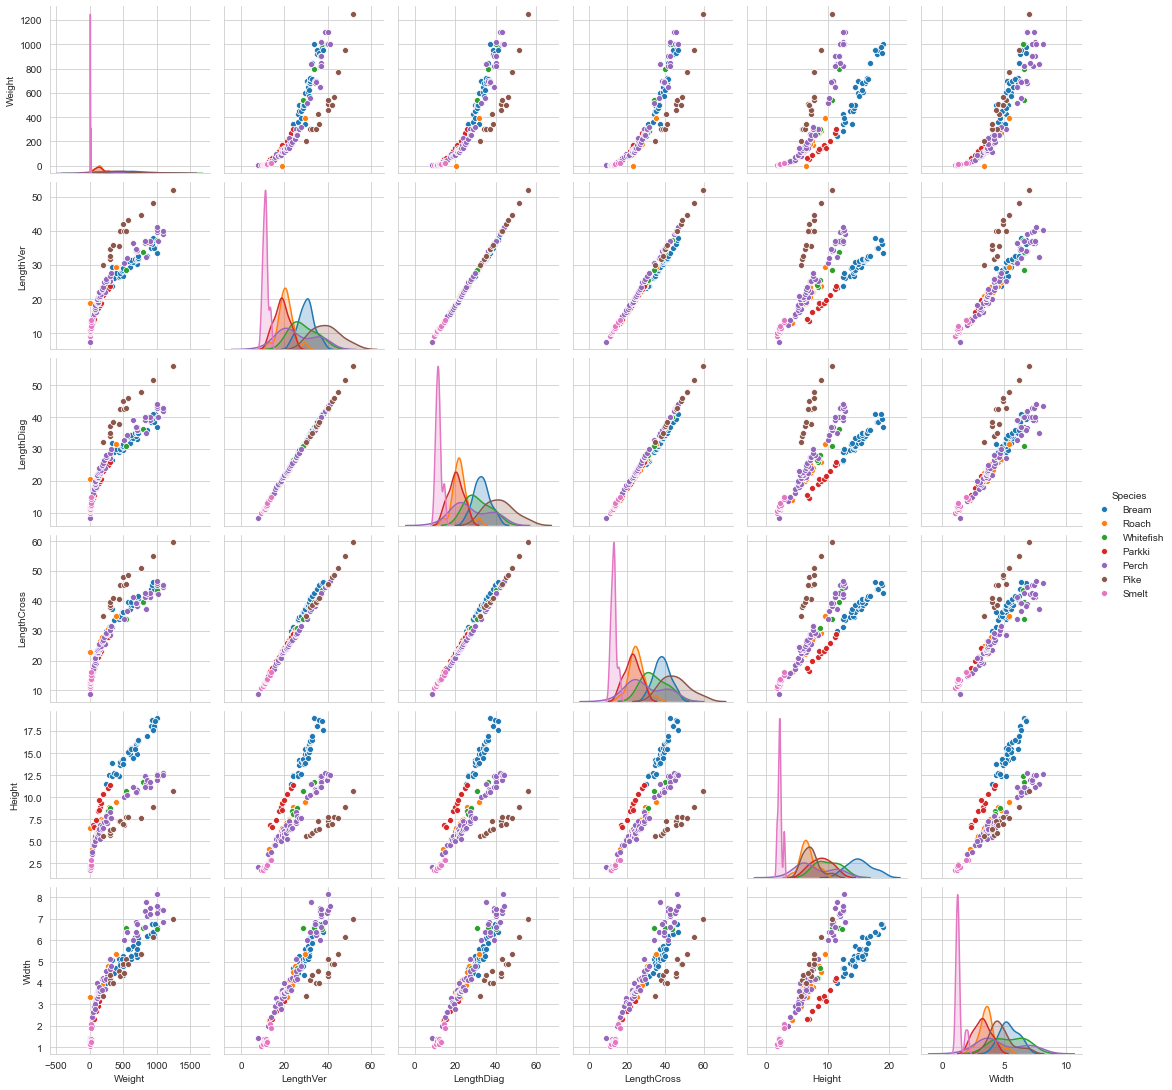

In [7]:
sns.pairplot(fish, hue='Species')

In [8]:
X = fish.drop('Species', axis=1)
y = fish['Species']

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.7,
                                                    random_state = 41)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
#Set of Models
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("SVM", SVC()))

In [14]:
#Run and Evaluate
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10 ,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {:.2f} ({:.2f})"
    print(msg.format(name, cv_results.mean(), cv_results.std()))

LR: 0.76 (0.25)
KNN: 0.57 (0.29)
RandomForest: 0.76 (0.21)
SVM: 0.47 (0.21)


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
#Predict
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("\n")

LR
0.7
              precision    recall  f1-score   support

       Bream       0.73      1.00      0.84        24
      Parkki       0.00      0.00      0.00         9
       Perch       0.65      0.97      0.78        36
        Pike       1.00      0.89      0.94         9
       Roach       0.00      0.00      0.00        18
       Smelt       0.83      1.00      0.91        10
   Whitefish       0.00      0.00      0.00         4

    accuracy                           0.70       110
   macro avg       0.46      0.55      0.50       110
weighted avg       0.53      0.70      0.60       110



KNN
0.4818181818181818
              precision    recall  f1-score   support

       Bream       0.51      0.88      0.65        24
      Parkki       0.00      0.00      0.00         9
       Perch       0.42      0.58      0.49        36
        Pike       0.14      0.11      0.12         9
       Roach       0.00      0.00      0.00        18
       Smelt       0.83      1.00      0.91   